In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import dabl 
import matplotlib.pyplot as plt

In [6]:
sns.set_style('whitegrid')

In [2]:
df = pd.read_csv('fetal_health.csv')
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [49]:
df.columns

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')

In [3]:
##Checking for null values
df.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

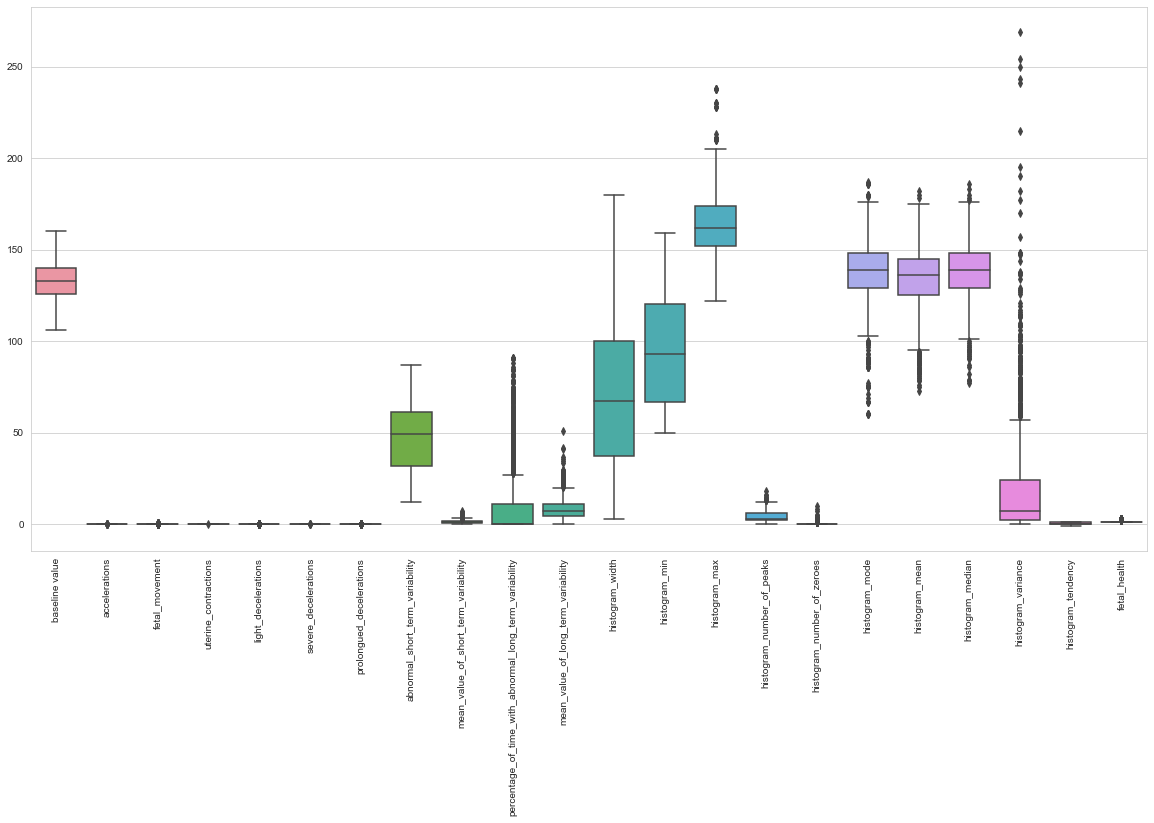

In [8]:
###Outlier detections

plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

In [14]:
##Boxplot says outliers are there, so removal is needed-setting up standard iqr stuff
def rem_outlier(feature,df):
    lb = feature.mean() - 3*feature.std()
    ub = feature.mean() + 3*feature.std()
    print('lowerbound: ',lb,' -------- upperbound: ', ub)
    df1 = df[(feature > lb) & (feature < ub)]

    print((df.shape[0] - df1.shape[0]), ' number of outliers from ', df.shape[0] )
    print(' ******************************************************\n')
    
    df = df1.copy()

    return df

In [15]:
##Removing the outlier from features showing highest levels of outliers from boxplot
df = rem_outlier(df.histogram_variance, df)
df = rem_outlier(df.histogram_median, df)
df = rem_outlier(df.histogram_mean, df)
df = rem_outlier(df.histogram_mode, df)
df = rem_outlier(df.percentage_of_time_with_abnormal_long_term_variability, df)
df = rem_outlier(df.mean_value_of_short_term_variability, df)

lowerbound:  -68.12481771467515  -------- upperbound:  105.74099833555945
44  number of outliers from  2126
 ******************************************************

lowerbound:  96.21293175778906  -------- upperbound:  180.7188645918747
17  number of outliers from  2082
 ******************************************************

lowerbound:  92.08366378331937  -------- upperbound:  178.71246212467094
17  number of outliers from  2065
 ******************************************************

lowerbound:  97.08081110895039  -------- upperbound:  180.2912592035496
17  number of outliers from  2048
 ******************************************************

lowerbound:  -45.78025783967678  -------- upperbound:  66.39473346744636
57  number of outliers from  2031
 ******************************************************

lowerbound:  -1.1711686306789326  -------- upperbound:  3.7819082456738666
30  number of outliers from  1974
 ******************************************************



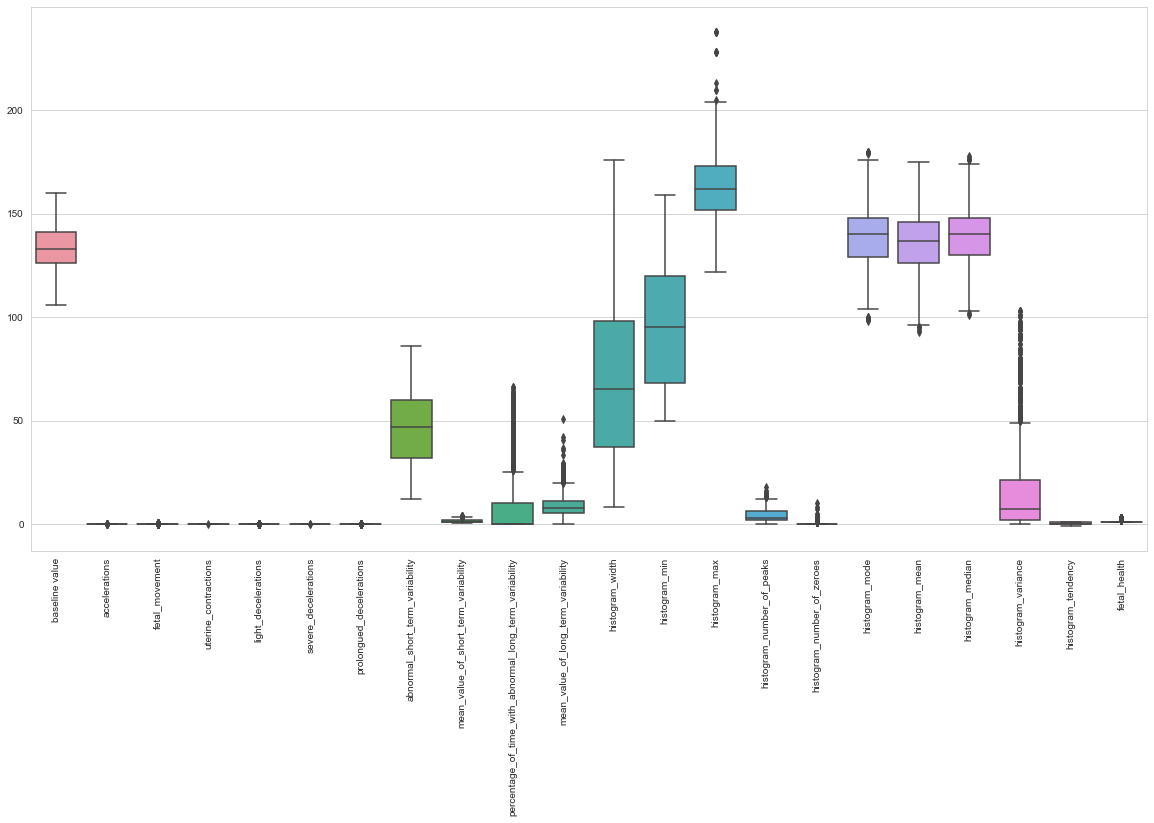

In [16]:
##Now checking 
plt.figure(figsize=(20,10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

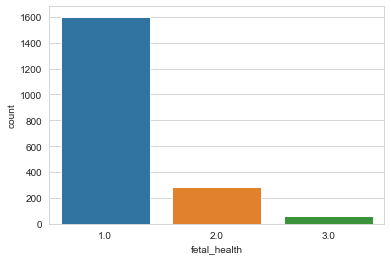

In [17]:
###Outliers reduced checking the target variable
sns.countplot(data=df,x='fetal_health')

In [18]:
##Data highly imbalanced, checking the values
df.fetal_health.value_counts()

1.0    1601
2.0     283
3.0      60
Name: fetal_health, dtype: int64

In [19]:
##Resampling to distribute it nicely
from sklearn.utils import resample

df_1 = df[df.fetal_health==1]
df_2 = df[df.fetal_health==2]
df_3 = df[df.fetal_health==3]

##Resampling of the minor categories to match the max one that is df_1 values = 1601
df_2_upsampled = resample(df_2,n_samples=1601,random_state=123,replace=True)
df_3_upsampled = resample(df_3,n_samples=1601,random_state=123,replace=True)

df_resampled = pd.concat([df_1,df_2_upsampled,df_3_upsampled])

df_resampled.fetal_health.value_counts()


1.0    1601
2.0    1601
3.0    1601
Name: fetal_health, dtype: int64

<AxesSubplot:xlabel='fetal_health', ylabel='count'>

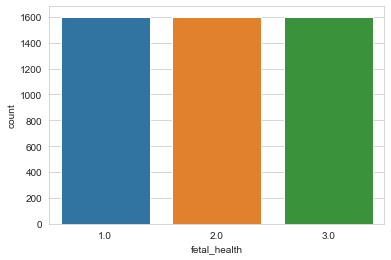

In [21]:
##Since we had enough data-- oversampling helps in balance the data
sns.countplot(data=df_resampled,x='fetal_health')

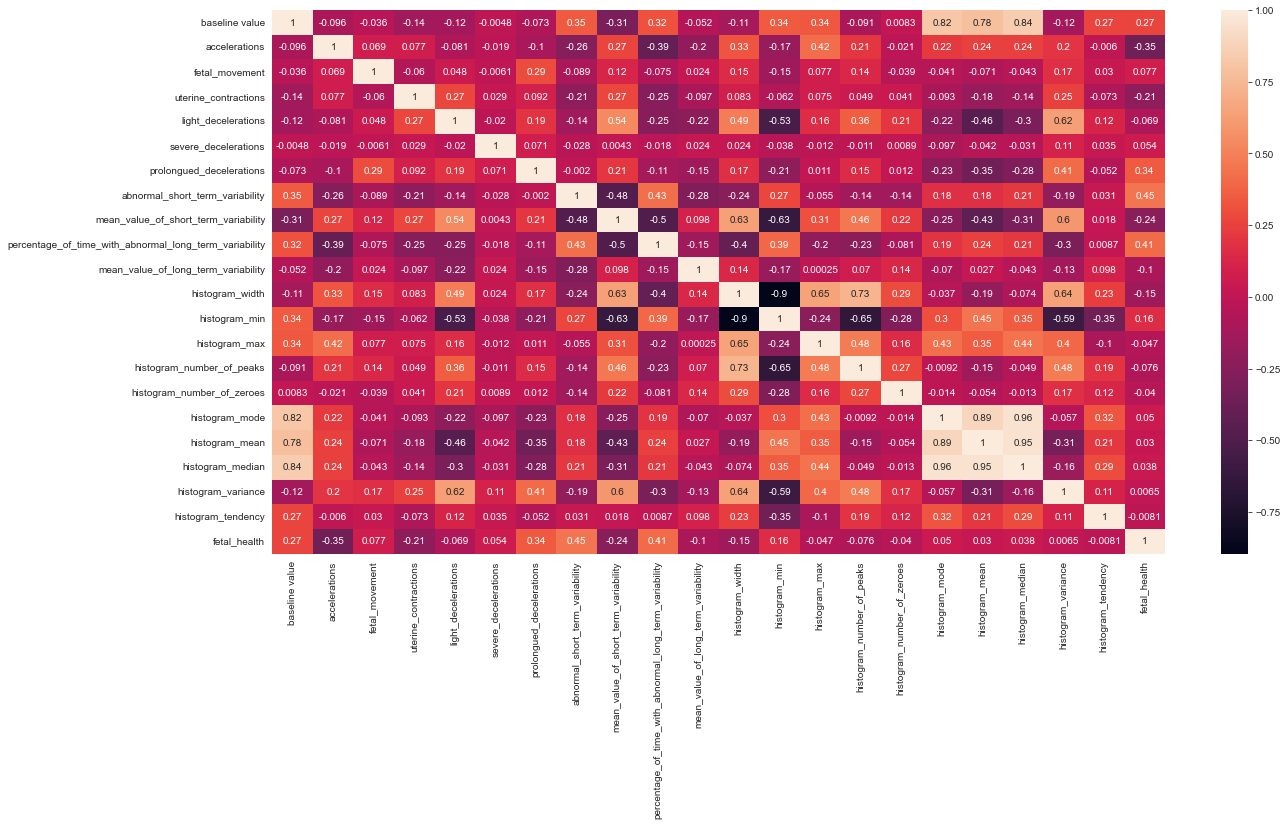

In [23]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [22]:
##Now, we work with the resampled dataset df_resampled
x = df_resampled.drop('fetal_health',axis=1)
y = df_resampled['fetal_health']
x.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
1,132.0,0.006,0.000,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,130.0,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0
2,133.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,130.0,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0
3,134.0,0.003,0.000,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0
4,132.0,0.007,0.000,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,117.0,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0
12,131.0,0.005,0.072,0.008,0.003,0.0,0.0,28.0,1.4,0.0,...,66.0,88.0,154.0,5.0,0.0,135.0,134.0,137.0,7.0,1.0


In [27]:
##Splitting the data into train and set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state = 0)

In [28]:
##Standarization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [37]:
##importing all algos and metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
from sklearn.preprocessing import LabelBinarizer

def evaluation_metrics(y_test,y_pred):
    print('>>>>> Accuracy:',accuracy_score(y_test,y_pred))
    print('')
    print('>>>>> Classification Report: \n',classification_report(y_test,y_pred))
    print('')
    print('>>>>> Confusion Matrix: \n \n')
    sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

In [30]:
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [33]:
model_acc = pd.DataFrame(columns=['Model','Accuracy'])
models = {'XGBOOST': XGBClassifier(),'RFT':RandomForestClassifier(),'DT':DecisionTreeClassifier()}

for test,clf in models.items():
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    train_pred = clf.predict(x_train)
    train_acc = accuracy_score(y_train,train_pred)
    print('\n',test + 'scores')
    print(acc)
    print(classification_report(y_test,y_pred))
    print(confusion_matrix(y_test,y_pred))
    model_accuracy = model_acc.append({'Model': test, 'Accuracy': acc, 'Train_acc': train_acc}, ignore_index=True)

C:\Users\barna\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:00:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.

 XGBOOSTscores
0.9866777685262281
              precision    recall  f1-score   support

         1.0       1.00      0.96      0.98       414
         2.0       0.96      1.00      0.98       400
         3.0       1.00      1.00      1.00       387

    accuracy                           0.99      1201
   macro avg       0.99      0.99      0.99      1201
weighted avg       0.99      0.99      0.99      1201

[[398  16   0]
 [  0 400   0]
 [  0   0 387]]

 RFTscores
0.980849292256453
              precision    recall  f1-score   support

         1.0       0.99      0.95      0.97       414
         2.0       0.95      0.99      0.97       400
         3.0       1.00      1.00 

C:\Users\barna\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:02:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
>>>>> Accuracy: 0.9866777685262281

>>>>> Classification Report: 
               precision    recall  f1-score   support

         1.0       1.00      0.96      0.98       414
         2.0       0.96      1.00      0.98       400
         3.0       1.00      1.00      1.00       387

    accuracy                           0.99      1201
   macro avg       0.99      0.99      0.99      1201
weighted avg       0.99      0.99      0.99      1201


>>>>> Confusion Matrix: 
 



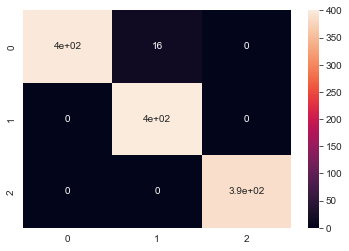

In [38]:
##XGBOOST
xg_clf = XGBClassifier()
xg_clf.fit(x_train,y_train)
pred = xg_clf.predict(x_test)
evaluation_metrics(y_test,pred)

In [44]:
import pickle
with open('model_pkl','wb') as files:
    pickle.dump(xg_clf,files)

In [45]:
input = np.array([[134.0,	0.003,	0.0,	0.008,	0.003,	0.0,	0.0,	16.0,	2.4,	0.0,	23.0,	117.0,	53.0,	170.0,	11.0,	0.0,	137.0,	134.0,	137.0,	13.0,	1.0]])
z = xg_clf.predict(input)
print(z)

[2.]


In [46]:
z.shape

(1,)

In [48]:
if z == 1:
    print("Norma")
elif z ==2:
    print("Suspect")
else:
    print("pathological")

Suspect


In [ ]:
def evaluation(df,test):
    